<h1>Part 6: Time Series Prediction with Neural Networks in Python </h1><br>
http://dacatay.com/data-science/part-6-time-series-prediction-neural-networks-python/

In [181]:
# load required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

In [182]:
np.random.seed(7)
df = pd.read_csv('../input/airport-passenger.csv', parse_dates=True, index_col=0)
data = df.values
data = data.astype('float32')
print(data[0:6])

[[112.]
 [118.]
 [132.]
 [129.]
 [121.]
 [135.]]


In [183]:
train = data[0:120, :]
test = data[120:, :]
print(train[0:3])
print(test[0:3])

[[112.]
 [118.]
 [132.]]
[[360.]
 [342.]
 [406.]]


In [184]:
def prepare_data(data, lags=1):
    X,y = [], []
    for row in range(len(data) - lags -1):
        a = data[row:(row + lags),0]
        X.append(a)
        y.append(data[row + lags,0])
    return np.array(X), np.array(y)


In [185]:
lags=1
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)
y_true = y_test
print(X_train[0:5], "\n", y_train[0:5])

[[112.]
 [118.]
 [132.]
 [129.]
 [121.]] 
 [118. 132. 129. 121. 135.]


In [186]:
print(len(X_train), "\t", len(X_test))

118 	 22


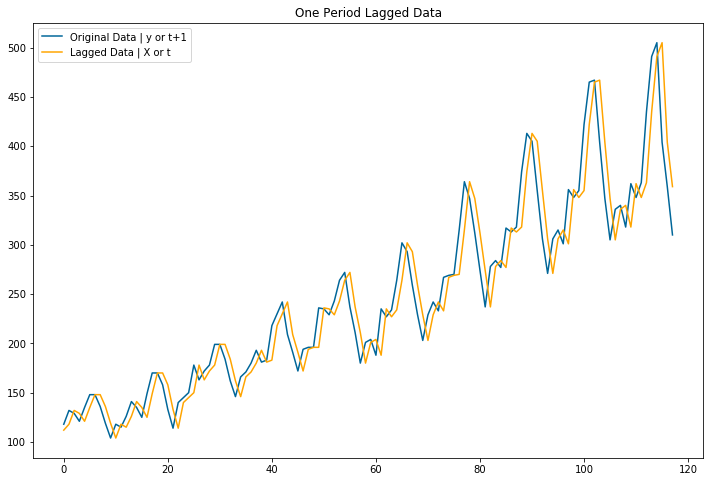

In [187]:
plt.plot(y_train, label='Original Data | y or t+1', color='#006699')
plt.plot(X_train, label='Lagged Data | X or t', color='orange')
# plt.plot(y_test, label='Original Data | y or t+1', color='#006699')
# plt.plot(X_test, label='Lagged Data | X or t', color='orange')
plt.legend(loc='upper left')
plt.title('One Period Lagged Data')
plt.show()

In [188]:
mdl = Sequential()
mdl.add(Dense(3, input_dim=lags, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=200, batch_size=2, verbose=0)

In [189]:
import math
train_score = mdl.evaluate(X_train, y_train, verbose=0)
print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, math.sqrt(train_score)))
test_score = mdl.evaluate(X_test, y_test, verbose=0)
print('Test Score: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))

Train Score: 816.70 MSE (28.58 RMSE)
Test Score: 2800.48 MSE (52.92 RMSE)


In [190]:
# Generate predictions for training
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)
print("X_train", "\n", X_train[0:3])
print("X_test", "\n", X_test[0:3])
print(train_predict[0:3])
print(test_predict[0:3])


# shift train predictions for plotting
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags: len(train_predict) + lags, :] = train_predict

# shift test predictions for plotting
test_predict_plot = np.empty_like(data)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_predict) + (lags*2) +1: len(data)-1,:] = test_predict

X_train 
 [[112.]
 [118.]
 [132.]]
X_test 
 [[360.]
 [342.]
 [406.]]
[[113.41616]
 [119.35382]
 [133.20839]]
[[358.83963]
 [341.0266 ]
 [404.36172]]


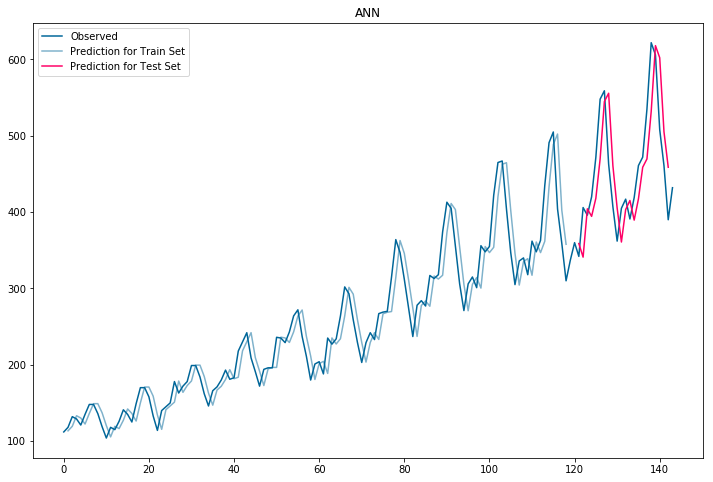

In [191]:
# plot baseline and predictions
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(data, label='Observed', color='#006699');
plt.plot(train_predict_plot, label='Prediction for Train Set', color='#006699', alpha=0.5);
plt.plot(test_predict_plot, label='Prediction for Test Set', color='#ff0066');
plt.legend(loc='best')
plt.title('ANN')
plt.show()

In [192]:
mse = ((y_test.reshape(-1,1) - test_predict.reshape(-1,1)) **2).mean()
#print(y_test.shape)
#y_test.reshape(-1,1)
#print(y_test.shape)

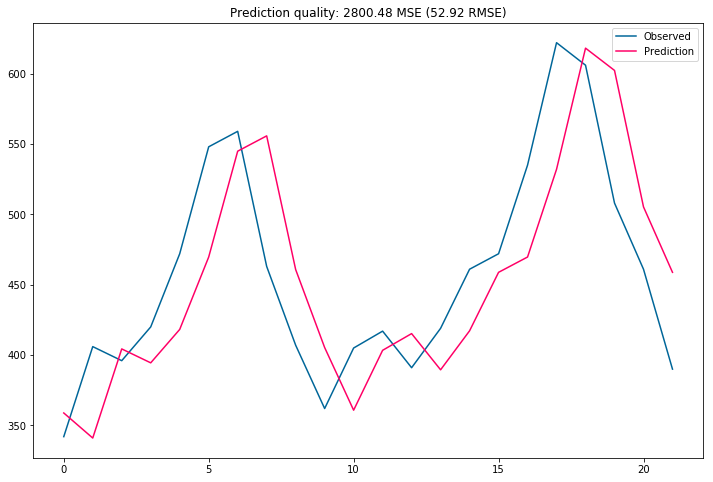

In [193]:
plt.title('Prediction quality: {:.2f} MSE ({:.2f} RMSE)'.format(mse, math.sqrt(mse)))
plt.plot(y_test.reshape(-1,1), label='Observed', color='#006699')
plt.plot(test_predict.reshape(-1,1), label='Prediction', color='#ff0066')
plt.legend(loc='best')
plt.show()

<h2>Multilayer Perceptron with Window</h2><br>

In [194]:
lags = 3
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)
print(X_train[0:3], "\n")
print(y_train[0:3])

[[112. 118. 132.]
 [118. 132. 129.]
 [132. 129. 121.]] 

[129. 121. 135.]


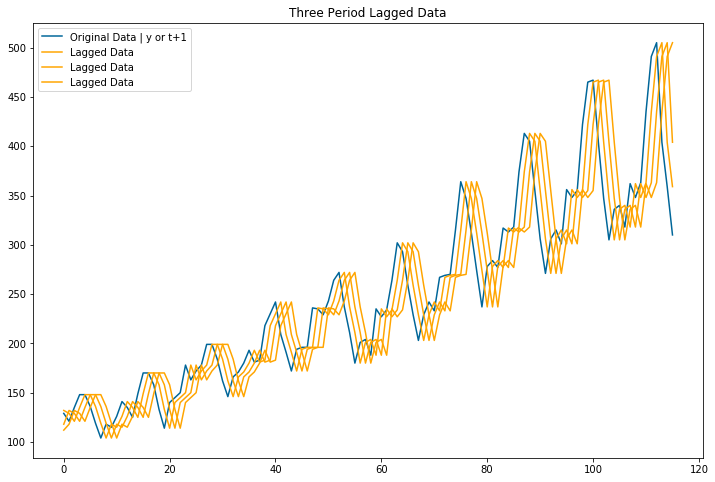

In [195]:
# plot the created data
plt.plot(y_train, label='Original Data | y or t+1', color='#006699')
plt.plot(X_train, label='Lagged Data', color='orange')
plt.legend(loc='best')
plt.title('Three Period Lagged Data')
plt.show()

In [196]:
# create and fit multilayer perceptron model
mdl = Sequential()
mdl.add(Dense(4, input_dim=lags, activation='relu'))
mdl.add(Dense(8, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=400, batch_size=2, verbose=0)

In [197]:
# Estimate model performance
train_score = mdl.evaluate(X_train, y_train, verbose=0)
print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, math.sqrt(train_score)))
test_score = mdl.evaluate(X_test, y_test, verbose=0)
print('Test Score: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))

Train Score: 717.03 MSE (26.78 RMSE)
Test Score: 2193.71 MSE (46.84 RMSE)


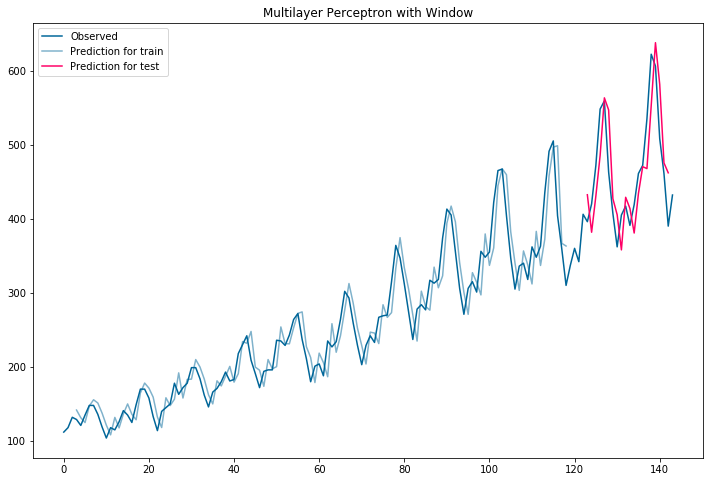

In [198]:
# generate predictions for training
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)
 
# shift train predictions for plotting
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags: len(train_predict) + lags, :] = train_predict
 
# shift test predictions for plotting
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(lags * 2)+1:len(data)-1, :] = test_predict
 
# plot observation and predictions
plt.plot(data, label='Observed', color='#006699');
plt.plot(train_predict_plot, label='Prediction for train', color='#006699', alpha=0.5);
plt.plot(test_predict_plot, label='Prediction for test', color='#ff0066');
plt.legend(loc='best')
plt.title('Multilayer Perceptron with Window')
plt.show()

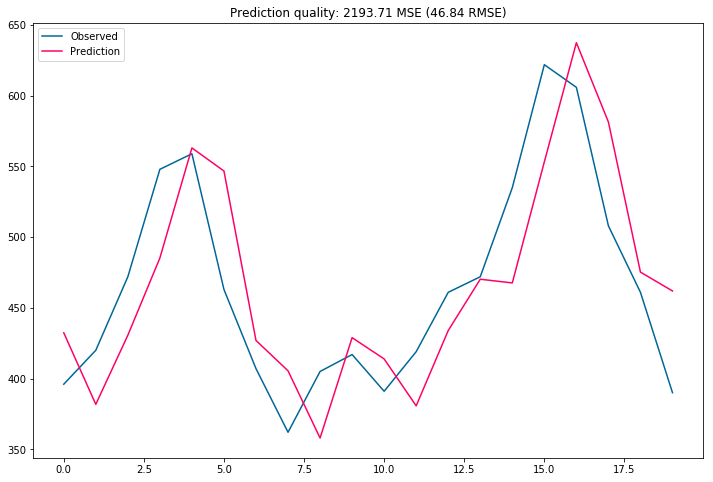

In [199]:
mse = ((y_test.reshape(-1, 1) - test_predict.reshape(-1, 1)) ** 2).mean()
plt.title('Prediction quality: {:.2f} MSE ({:.2f} RMSE)'.format(mse, math.sqrt(mse)))
plt.plot(y_test.reshape(-1, 1), label='Observed', color='#006699')
plt.plot(test_predict.reshape(-1, 1), label='Prediction', color='#ff0066')
plt.legend(loc='upper left');
plt.show()

<h2>Time Series Prediction with LSTM Recurrent Neural Network</h2>

In [222]:
# normalize the dataset
print(data[0:5])
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(data)
# split into train and test sets
train = dataset[0:120, :]
test = dataset[120:, :]
# reshape into X=t and Y=t+1
lags = 3
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)
print("X_train shape: ", X_train.shape)
print(X_train[0:3])

[[112.]
 [118.]
 [132.]
 [129.]
 [121.]]
X_train shape:  (116, 3)
[[0.01544401 0.02702703 0.05405405]
 [0.02702703 0.05405405 0.04826255]
 [0.05405405 0.04826255 0.03281853]]


In [223]:
# reshape input to be [samples, time_steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [224]:
print("X_train shape: ", X_train.shape)
#print(X_train[0:3])

X_train shape:  (116, 1, 3)


In [225]:
# create and fit the LSTM network
mdl = Sequential()
mdl.add(Dense(3, input_shape=(1,lags), activation='relu'))
mdl.add(LSTM(6, activation='relu'))
mdl.add(Dense(1, activation='relu'))
mdl.compile(loss='mean_squared_error', optimizer='adam')
#mdl.fit(X_train, y_train, epochs=200, batch_size=1, verbose=2)
#mdl.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1) # show progress bar
mdl.fit(X_train, y_train, epochs=200, batch_size=1, verbose=0) # show progress bar

In [226]:
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)

# invert transformation
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [227]:
from sklearn.metrics import mean_squared_error
# calculate root mean squared error
train_score = math.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
print('Train Score: {:.2f} RMSE'.format(train_score))
test_score = math.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
print('Test Score: {:.2f} RMSE'.format(test_score))

Train Score: 27.31 RMSE
Test Score: 48.96 RMSE


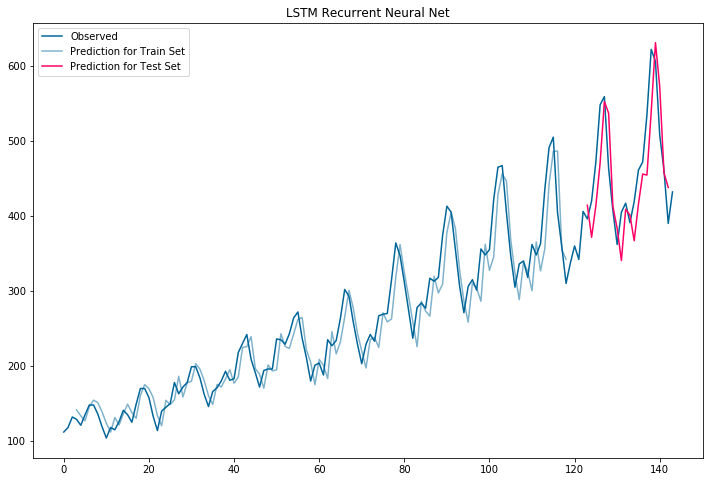

In [228]:
# shift train predictions for plotting
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags:len(train_predict)+lags, :] = train_predict
 
# shift test predictions for plotting
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (lags * 2)+1:len(data)-1, :] = test_predict
 
# plot observation and predictions
plt.plot(data, label='Observed', color='#006699');
plt.plot(train_predict_plot, label='Prediction for Train Set', color='#006699', alpha=0.5);
plt.plot(test_predict_plot, label='Prediction for Test Set', color='#ff0066');
plt.legend(loc='upper left')
plt.title('LSTM Recurrent Neural Net')
plt.show()

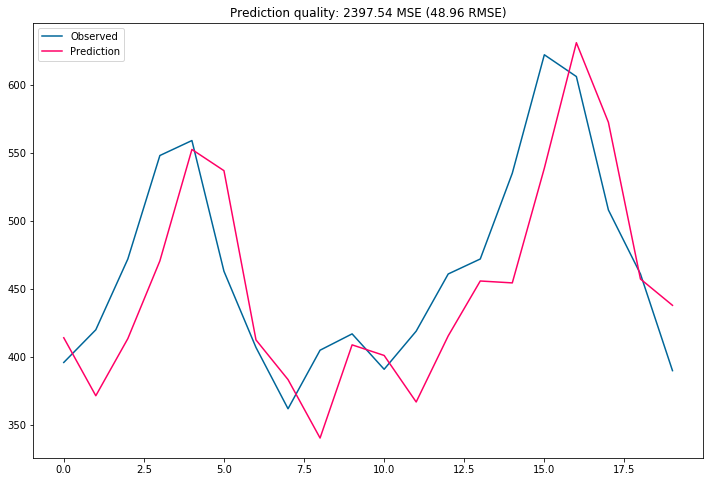

In [230]:
mse = ((y_test.reshape(-1, 1) - test_predict.reshape(-1, 1)) ** 2).mean()
plt.title('Prediction quality: {:.2f} MSE ({:.2f} RMSE)'.format(mse, math.sqrt(mse)))
plt.plot(y_test.reshape(-1, 1), label='Observed', color='#006699')
plt.plot(test_predict.reshape(-1, 1), label='Prediction', color='#ff0066')
plt.legend(loc='upper left');
plt.show()

<h2> LSTM only with LSTM Layer

In [231]:
# normalize the dataset
print(data[0:5])
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(data)
# split into train and test sets
train = dataset[0:120, :]
test = dataset[120:, :]
# reshape into X=t and Y=t+1
lags = 3
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)
print("X_train shape: ", X_train.shape)
print(X_train[0:3])

[[112.]
 [118.]
 [132.]
 [129.]
 [121.]]
X_train shape:  (116, 3)
[[0.01544401 0.02702703 0.05405405]
 [0.02702703 0.05405405 0.04826255]
 [0.05405405 0.04826255 0.03281853]]


In [232]:
# reshape input to be [samples, time_steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [233]:
# create and fit the LSTM network
mdl = Sequential()
mdl.add(LSTM(6, input_shape=(1,lags), activation='relu'))
mdl.add(Dense(1, activation='relu'))
mdl.compile(loss='mean_squared_error', optimizer='adam')
#mdl.fit(X_train, y_train, epochs=200, batch_size=1, verbose=2)
#mdl.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1) # show progress bar
mdl.fit(X_train, y_train, epochs=200, batch_size=1, verbose=0) # show progress bar

In [234]:
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)

# invert transformation
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [235]:
from sklearn.metrics import mean_squared_error
# calculate root mean squared error
train_score = math.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
print('Train Score: {:.2f} RMSE'.format(train_score))
test_score = math.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
print('Test Score: {:.2f} RMSE'.format(test_score))

Train Score: 25.46 RMSE
Test Score: 49.36 RMSE


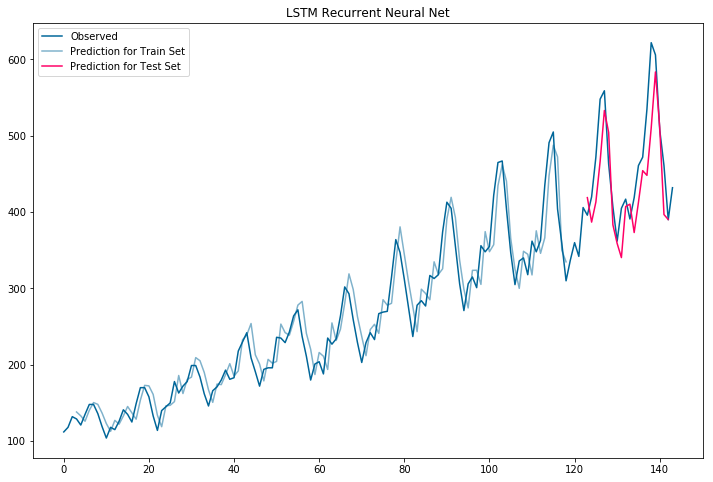

In [236]:
# shift train predictions for plotting
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags:len(train_predict)+lags, :] = train_predict
 
# shift test predictions for plotting
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (lags * 2)+1:len(data)-1, :] = test_predict
 
# plot observation and predictions
plt.plot(data, label='Observed', color='#006699');
plt.plot(train_predict_plot, label='Prediction for Train Set', color='#006699', alpha=0.5);
plt.plot(test_predict_plot, label='Prediction for Test Set', color='#ff0066');
plt.legend(loc='upper left')
plt.title('LSTM Recurrent Neural Net')
plt.show()

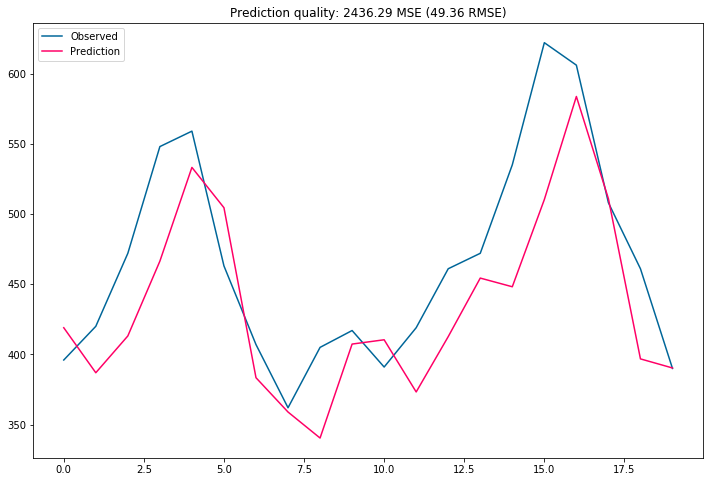

In [237]:
mse = ((y_test.reshape(-1, 1) - test_predict.reshape(-1, 1)) ** 2).mean()
plt.title('Prediction quality: {:.2f} MSE ({:.2f} RMSE)'.format(mse, math.sqrt(mse)))
plt.plot(y_test.reshape(-1, 1), label='Observed', color='#006699')
plt.plot(test_predict.reshape(-1, 1), label='Prediction', color='#ff0066')
plt.legend(loc='upper left');
plt.show()

Reference: <br>
Part 6: Time Series Prediction with Neural Networks in Python, http://dacatay.com/data-science/part-6-time-series-prediction-neural-networks-python/ 